In [1]:
import openml
import pandas as pd
import numpy as np

In [3]:
def process_hpc_file(file):
    lines = []
    with open(file, "r") as f:
        data = f.readlines()
    for line in data:
        if line.startswith("INFO:root") and (not "https" in line and not "fallback" in line and not "sklearn.utils" in line):
            lines.append(line)
    ids = set()
    results = []
    for line in lines:
        items = "".join(line.replace("INFO:root:", "")).replace("in", "").replace("seconds", "").strip().split(",")
        dataset_id, pipeline = int(items[0]), int(items[1].strip())
        remainder = items[2].strip().split(" ")
        score, time = float(remainder[0]), float(remainder[2])
        ids.add(dataset_id)
        results.append([dataset_id, pipeline, score, time])
    
    df = pd.DataFrame(index = list(ids), columns = range(250))
    df_time = pd.DataFrame(index = list(ids), columns = range(250))
    for result in results:
        df_time.loc[result[0], result[1]] = result[3]
        time_result = df_time.loc[result[0], result[1]]
        if time_result > 360:
            df.loc[result[0], result[1]] = None
        else:
            df.loc[result[0], result[1]] = result[2]
    
    return df

In [51]:
df_first = process_hpc_file("hpc_output/bin/slurm-118181.out")
df_second = process_hpc_file("hpc_output/bin/slurm-118191.out")
df_third = process_hpc_file("hpc_output/bin/slurm-118234.out")
df_fourth = process_hpc_file("hpc_output/bin/slurm-118274.out")
df_fifth = process_hpc_file("hpc_output/bin/slurm-118275.out")
df_sixth = process_hpc_file("hpc_output/bin/slurm-118368.out")
df_seventh = process_hpc_file("hpc_output/bin/slurm-118369.out")
df_eighth = process_hpc_file("hpc_output/bin/slurm-118417.out")
df_ninth = process_hpc_file("hpc_output/bin/slurm-118523.out")
df_tenth = process_hpc_file("hpc_output/bin/slurm-118553.out")
df_eleventh = process_hpc_file("hpc_output/bin/slurm-118573.out")
df_additional = process_hpc_file("hpc_output/bin/slurm-118421_additional.out")

In [52]:
data_so_far = pd.concat([
    df_first, 
    df_second, 
    df_third,
    df_fourth,
    df_fifth,
    df_sixth,
    df_seventh,
    df_eighth,
    df_ninth,
    df_tenth,
    df_eleventh], axis = 0)

In [53]:
#drop all columns where all values are nan
df_additional = df_additional.dropna(axis = 1, how = "all")


In [54]:
# loop over df_additionals index and columns

for index in df_additional.index:
    for column in df_additional.columns:
        if not pd.isna(df_additional.loc[index, column]):
            data_so_far.loc[index, column] = df_additional.loc[index, column]

    

In [5]:
first = process_hpc_file("hpc_output/multi/slurm-118693.out")
second = process_hpc_file("hpc_output/multi/slurm-118694.out")
third = process_hpc_file("hpc_output/multi/slurm-118765.out")
fourth = process_hpc_file("hpc_output/multi/slurm-118767.out")
fifth = process_hpc_file("hpc_output/multi/slurm-118873.out")
sixth = process_hpc_file("hpc_output/multi/slurm-118874.out")
seventh = process_hpc_file("hpc_output/multi/slurm-118991.out")
eighth = process_hpc_file("hpc_output/multi/slurm-118992.out")
ninth = process_hpc_file("hpc_output/multi/slurm-119140.out")
tenth = process_hpc_file("hpc_output/multi/slurm-119141.out")


In [29]:
data_multi = pd.concat([
    first,
    second,
    third,
    fourth,
    fifth,
    sixth,
    seventh,
    eighth,
    ninth,
    tenth], axis = 0)

In [30]:
all_datasets = openml.datasets.list_datasets()

automl_dids = openml.study.get_suite(271).data
multi_dids = [did for did in automl_dids if all_datasets[did]['NumberOfClasses'] > 2]
data_multi = data_multi.loc[list(set(data_multi.index) - set(multi_dids))]

unbalanced_sets = data_multi[data_multi.isna().sum(axis = 1).sort_values(ascending=False) == 250].index
data_multi = data_multi.drop(unbalanced_sets)

/tmp/ipykernel_13268/2692729692.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unbalanced_sets = data_multi[data_multi.isna().sum(axis = 1).sort_values(ascending=False) == 250].index


In [31]:
data_multi

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
1536,-27.353047,-0.431306,-0.165805,-0.230941,-0.189191,-0.207745,-0.67102,-0.149388,-0.342098,-0.299722,...,-0.283123,-4.645857,-0.213349,-1.107857,-0.172807,-0.175026,-0.171219,-0.298578,-0.149294,-0.517222
1537,-26.595069,-0.331454,-0.114118,-0.175476,-0.167794,-0.140691,-0.51271,-0.108546,-0.254513,-0.488559,...,-0.202433,-4.166829,-0.169027,-0.77639,-0.120541,-0.125484,-0.122458,-0.233452,-0.108216,-0.367153
1540,-27.911192,-0.694255,-0.251248,-0.340354,-0.304244,-0.318308,-1.034043,-0.242821,-0.540571,-0.28319,...,-0.393505,-0.608438,-0.308252,-1.518461,-0.267405,-0.250861,-0.268898,-0.484394,-0.242278,-0.881807
516,-3.38434,-0.22165,-0.398733,-0.162397,-0.37643,-0.158394,-0.332683,-0.169488,-0.224477,-0.011027,...,-0.361251,-0.238023,-0.189824,-0.129356,-0.06269,-0.427908,-0.061928,-0.099465,-0.234608,-0.051672
1028,-25.194514,-3.485927,-0.910543,-1.402887,-0.916487,-1.040781,-3.152584,-2.039278,-0.969621,-1.138909,...,-0.951351,-0.911919,-0.91553,-3.485927,-0.987933,-0.912835,-0.97911,-3.453816,-1.148536,-3.485927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41972,-28.009476,-0.243706,-0.308626,-0.250681,-0.289198,-1.319245,-0.240645,-0.243746,-0.286123,None,...,-0.255197,-7.304702,-0.282879,-0.195498,-3.530186,-0.555839,-1.448162,-0.239251,None,-0.238188
1530,-22.70411,-0.688256,-0.361031,-0.382854,-0.343072,-0.517646,-1.11884,-0.327415,-0.543302,-0.506359,...,-0.39022,-0.80939,-0.463019,-2.326693,-0.41487,-0.368256,-0.423052,-0.475864,-0.336428,-0.901726
1531,-26.993515,-0.470036,-0.165086,-0.244352,-0.216543,-0.205099,-0.710396,-0.150084,-0.356204,-0.392383,...,-0.271415,-0.878366,-0.214182,-1.119787,-0.168631,-0.174329,-0.169062,-0.324821,-0.149448,-0.522831
1532,-26.989187,-0.433887,-0.15894,-0.23681,-0.220638,-0.201675,-0.630294,-0.143673,-0.349996,-0.392407,...,-0.288547,-14.95607,-0.231388,-1.046513,-0.167334,-0.167979,-0.194822,-0.285859,-0.142905,-0.483594


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_multi = pd.DataFrame(scaler.fit_transform(data_multi), index = data_multi.index, columns = data_multi.columns)
pipelines = pd.read_csv("SBPort/training/candidate_pipelines/candidate_pipelines_multi.csv", index_col = 0)
data_multi.columns = pipelines.index
# data_multi.to_csv("SBPort/training/performance_matrices/performance_matrix_multi.csv")

In [38]:
pd.DataFrame(data_multi.index, columns = ["did"]).to_csv("multiclass_dids.csv", index = False)

In [66]:
candidate_pipelines = pd.read_csv("hpc_files/candidate_pipelines_bin.csv")
df.columns = candidate_pipelines["pipelines"]
df
df.to_csv("performance_matrix_bin.csv")

## Meta Feature Imputation

In [79]:
multiclass_mf = pd.read_csv("SBPort/training/raw_metafeatures/metafeatures_multi.csv", index_col = 0)

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer    
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

numerical_features_with_outliers = [
    "cov_mean", "cov_sd", "iqr_mean", "iqr_sd", "max_mean", "max_sd", "mean_mean", "mean_sd", "median_mean", "median_sd", 
    "min_mean", "min_sd", "sd_mean", "sd_sd","variance_mean", "variance_sd", "eq_num_attr"
    ]

numerical_features_norm = list(set(multiclass_mf.columns) - set(numerical_features_with_outliers))

numerical_transformer_normal = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy = "mean")),
        ("scaler", MinMaxScaler())
    ]
)

numerical_transformer_outliers = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy = "median")),
        ("scaler", StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num_outliers", numerical_transformer_outliers, numerical_features_with_outliers),
        ("num", numerical_transformer_normal, numerical_features_norm)
    ]
)

imputed_frame = pd.DataFrame(preprocessor.fit_transform(multiclass_mf), index = multiclass_mf.index, columns = numerical_features_with_outliers + numerical_features_norm)

In [56]:

from SBPort.training.kernel_kmeans import KernelKMeans
# from SBPort.clustering.clustering import MetaKernelKMeans
kmeans = KernelKMeans(n_clusters = 8, random_state = 42, kernel = "rbf", gamma = 1)
kmeans.fit(imputed_frame)

KernelKMeans(gamma=1, kernel='rbf', n_clusters=8, random_state=42)

In [96]:
optics = OPTICS(min_samples = 10, metric = "minkowski", n_jobs = -1)
optics.fit(imputed_frame)

OPTICS(min_samples=10, n_jobs=-1)

In [97]:
labels = optics.labels_[optics.ordering_]
labels

array([-1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1])

In [6]:
import openml
from sklearn.model_selection import train_test_split
all_datasets = openml.datasets.list_datasets()
automl_dids = openml.study.get_suite(271).data
binary_automlbench_dids = [did for did in automl_dids if (all_datasets[did]["NumberOfClasses"] == 2 and all_datasets[did]["NumberOfInstances"]*all_datasets[did]["NumberOfFeatures"] < 10_000_000 and all_datasets[did]["NumberOfInstances"] < 500_000)]
multi_automlbench_dids = [did for did in automl_dids if (all_datasets[did]["NumberOfClasses"] > 2 and all_datasets[did]["NumberOfInstances"]*all_datasets[did]["NumberOfFeatures"] < 10_000_000 and all_datasets[did]["NumberOfInstances"] < 500_000)]
binary_validation, binary_test = train_test_split(binary_automlbench_dids, test_size = 10, random_state = 0)




NameError: name 'binary_val' is not defined

In [9]:
for item in binary_validation:
    it = all_datasets[item]
    print(it["name"])

jasmine
kr-vs-kp
madeline
pc4
Amazon_employee_access
PhishingWebsites
wilt
Click_prediction_small
gina
credit-g
Bioresponse
MiniBooNE
churn
philippine
ozone-level-8hr
bank-marketing
phoneme
Australian
sylvine
kc1
blood-transfusion-service-center


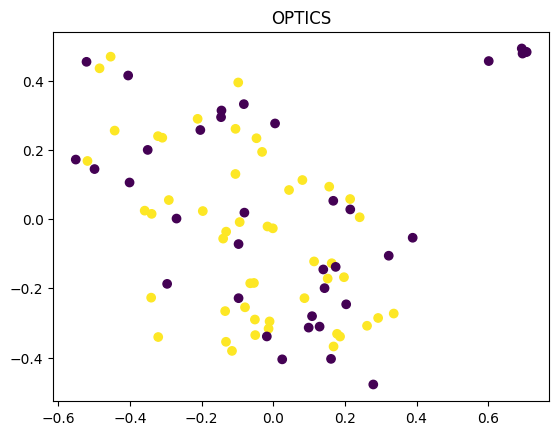

In [94]:
from SBPort.utils import plot_2d_cluster
# from SBPort.training.fit_inference_pipeline import PortfolioTransformer
import matplotlib.pyplot as plt

# data = sio.load("SBPort/inference_pipelines/inference_pipeline_bin_kernel_kmeans_5_psize_16", trusted = True)
# print(data[1].clustering_algorithm.labels_)
plt.title(f"OPTICS")
plot_2d_cluster(imputed_frame, "pca", labels = optics.labels_[optics.ordering_])
# plt.savefig("OPTICS.png")
plt.show()

In [2]:
bin_df = pd.read_csv("SBPort/training/raw_metafeatures/metafeatures_bin.csv", index_col = 0)
pf_matrix = pd.read_csv("SBPort/training/performance_matrices/performance_matrix_bin.csv", index_col = 0)
bin_df = bin_df.applymap(lambda x: np.nan if x == np.inf else x)


In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer    
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

numerical_features_with_outliers = ["cov_mean", "cov_sd", "iqr_mean", "iqr_sd", "max_mean", "max_sd", "mean_mean", "mean_sd", "median_mean", "median_sd", "min_mean", "min_sd", "sd_mean", "sd_sd",
"variance_mean", "variance_sd", "eq_num_attr"]

numerical_features_norm = list(set(bin_df.columns) - set(numerical_features_with_outliers))

numerical_transformer_normal = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy = "mean")),
        ("scaler", MinMaxScaler()),
    ]
)

numerical_transformer_outliers = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy = "median")),
        ("scaler", StandardScaler()),
    ]
)



preprocessor = ColumnTransformer(
    transformers = 
    [
        
        ("num_outliers", numerical_transformer_outliers, numerical_features_with_outliers),
        # ("cat", categorical_transformer, categorical_features),
        ("num", numerical_transformer_normal, numerical_features_norm),
    ]
)




In [4]:
transformed_df = preprocessor.fit_transform(bin_df)

In [5]:
filtered_df = pd.DataFrame(transformed_df, index = bin_df.index, columns = numerical_features_with_outliers + numerical_features_norm)

In [58]:
from sklearn.cluster import OPTICS, KMeans, DBSCAN
# from SBPort.training.kernel_kmeans import KernelKMeans
# from SBPort.clustering.clustering import MetaKernelKMeans
optics = OPTICS(eps = 0.5, min_samples = 10, metric = "minkowski", n_jobs = -1)
# filtered_df = transformed_df[["nr_cat", "nr_num", "num_to_cat_ratio", "nr_bin", "outliers", "nr_feat", "nr_inst", "missing_mean", "missing_sd"]]
# filtered_df = preprocessor.transform(bin_df)
optics.fit(filtered_df)
# kmeans = KMeans(n_clusters = 3, random_state = 42)
# kmeans = KernelKMeans(n_clusters = 5, random_state = 42, kernel = "rbf", gamma = 1)
# kmeans.fit(filtered_df)


OPTICS(eps=0.5, min_samples=10, n_jobs=-1)

In [76]:
labels = optics.labels_[optics.ordering_]
reachability = optics.reachability_[optics.ordering_]

In [1]:
import skops.io as sio
from pathlib import Path
from SBPort.training.fit_inference_pipeline import PortfolioTransformer


def load_inference_pipeline(
    path: Path
):
    with open(path, "rb") as f:
        inference_pipeline: Pipeline = sio.load(f, trusted = True)
    return inference_pipeline

path = Path("SBPort/inference_pipelines/bin/inference_pipeline_bin_kernel_kmeans_5_psize_16")
inf_pipe = load_inference_pipeline(path)
print(inf_pipe.portfolio)

AttributeError: module '__main__' has no attribute 'PortfolioTransformer'

In [77]:
#get reachability of the labels that are 0
reachability = reachability[labels == 1]

In [78]:
#threshold 0.8
#for every new data point:
#calculate minkowski distance (or other) to the closest point
#check whether the distance is smaller than 0.8
#if true --> label as the same cluster
reachability

array([0.52036508, 0.4520231 , 0.4520231 , 0.42470215, 0.42470215,
       0.33925458, 0.33925458, 0.33925458, 0.33925458, 0.33925458,
       0.33925458, 0.32745511, 0.35255713, 0.36011979, 0.36011979,
       0.40981833, 0.41586602, 0.421845  , 0.45353841, 0.47748038,
       0.47748038, 0.47899419, 0.48559466, 0.48768225])

(0.0, 10.0)

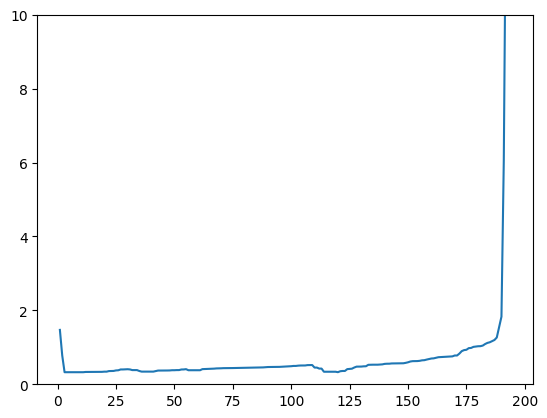

In [72]:
import matplotlib.pyplot as plt
plt.plot(reachability)
plt.ylim([0, 10])

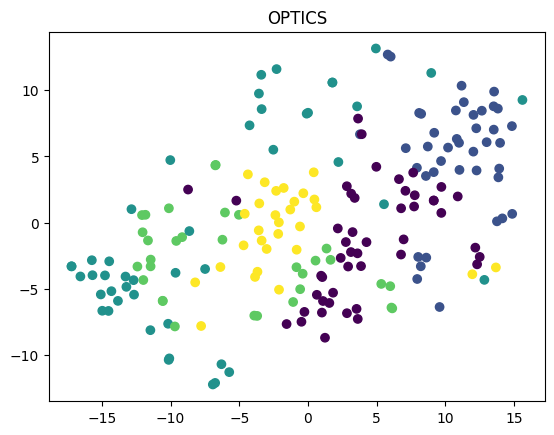

In [29]:
from SBPort.utils import plot_2d_cluster
import skops.io as sio
from SBPort.training.fit_inference_pipeline import PortfolioTransformer
import matplotlib.pyplot as plt

# data = sio.load("SBPort/inference_pipelines/inference_pipeline_bin_kernel_kmeans_5_psize_16", trusted = True)
# print(data[1].clustering_algorithm.labels_)
plt.title(f"OPTICS")
plot_2d_cluster(filtered_df, "tsne", labels = kmeans.labels_)
# plt.savefig("OPTICS.png")
plt.show()

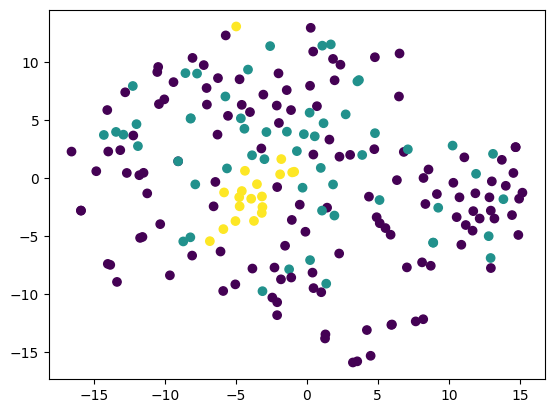

In [138]:
from SBPort.utils import plot_2d_cluster
import skops.io as sio
from SBPort import kernel_kmeans
from SBPort.training.fit_inference_pipeline import PortfolioTransformer

data = sio.load("SBPort/inference_pipelines/inference_pipeline_bin_kernel_kmeans_3_psize_16", trusted = True)

plot_2d_cluster(filtered_df, "tsne", labels = data[1].clustering_algorithm.labels_)

In [8]:
kmeans.plot(filtered_df, reduction_method = "pca")

NameError: name 'kmeans' is not defined

In [65]:
# for label in labels:
data_cluster = data_so_far.loc[data_so_far.index[np.where(kmeans.labels_ == 4)]]
print((data_cluster.sum(axis = 0)/len(data_cluster)).sort_values()[-8:])

77     0.908924
108    0.909004
75     0.909337
117    0.909401
229     0.90993
28     0.909949
181    0.909963
248     0.90997
dtype: object


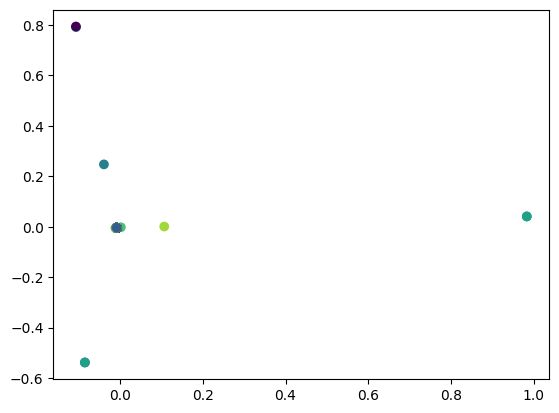

In [287]:
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA
from sklearn.kernel_approximation import RBFSampler
import matplotlib.pyplot as plt

# X = RBFSampler(gamma = 0.2, random_state=0).fit_transform(filtered_df)
# 
reduced_X = KernelPCA(n_components = 2, kernel = "rbf", random_state = 0).fit_transform(transformed_df)
# reduced_X = TSNE(n_components = 2, random_state = 42).fit_transform(transfoMinMaxScalerrmed_df)

plt.scatter(reduced_X.T[0], reduced_X.T[1], c = kmeans.labels_)
plt.show()
# transformed_df

In [3]:
import json
import pandas as pd

with open("SBPort/results_test.json", "r") as f:
    data = json.load(f)

In [8]:
pos_difference = 0
best_port = 0
for ind in data:
    df = pd.DataFrame.from_dict(data[ind], orient = "index")
    # pos_difference += 1*(df["difference"] >= 0)
    pos_difference += df["difference"]
    best_port += 1*(df["difference_max"] == 0)

In [11]:
best_port

3    6
5    6
8    1
Name: difference_max, dtype: int64

In [1]:
import openml
import pandas as pd

In [2]:
all_datasets = openml.datasets.list_datasets()

In [5]:
suite = openml.study.get_suite(271)

In [22]:
datasets_train = pd.read_csv("hpc_files/binary_dids.csv")

In [13]:
suite_data = suite.data

In [34]:
binary_dids = []
for did in suite_data:
    if all_datasets[did]["NumberOfClasses"] == 2:
        binary_dids.append(did)

In [47]:
filt_df = pd.DataFrame(list(set(datasets_train["did"]) - set(binary_dids)), columns = ["did"])
filt_df.to_csv("hpc_files/binary_dids.csv", index = False)

In [41]:
datasets_train

,did
0,793
1,778
2,1442
3,811
4,336
...,...
200,41943
201,42175
202,42176
203,42464


In [68]:
df2 = pd.read_csv("SBPort/training/raw_metafeatures/metafeatures_bin_old.csv", index_col = 0)

In [71]:
df2.loc[list(set(filt_df["did"]))].to_csv("SBPort/training/raw_metafeatures/metafeatures_bin.csv")

In [4]:
dataset = openml.study.get_suite(271).data

In [5]:
test = list(range(16))
test[:16]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [5]:
for did in dataset:
    print(did, all_datasets[did]["NumberOfInstances"])

181 1484.0
1111 50000.0
1596 581012.0
1457 1500.0
40981 690.0
40983 4839.0
23517 96320.0
1489 5404.0
31 1000.0
40982 1941.0
41138 76000.0
41163 10000.0
41164 8237.0
41143 2984.0
1169 539383.0
41167 416188.0
41147 425240.0
41158 3153.0
1487 2534.0
54 846.0
41144 3140.0
41145 5832.0
41156 4147.0
41157 100.0
41168 83733.0
4541 101766.0
1515 571.0
188 736.0
1464 748.0
1494 1055.0
1468 1080.0
1049 1458.0
23 1473.0
40975 1728.0
12 2000.0
1067 2109.0
40984 2310.0
40670 3186.0
3 3196.0
40978 3279.0
4134 3751.0
40701 5000.0
1475 6118.0
4538 9873.0
4534 11055.0
41146 5124.0
41142 5418.0
40498 4898.0
40900 5100.0
40996 70000.0
40668 67557.0
4135 32769.0
1486 34465.0
41027 44819.0
1461 45211.0
1590 48842.0
41169 65196.0
41166 58310.0
41165 10000.0
40685 58000.0
41159 20000.0
41161 20000.0
41150 130064.0
41162 72983.0
42733 39948.0
42734 50789.0
42732 2215023.0
42746 4898431.0
42742 595212.0
42769 1000000.0
43072 50000.0


In [33]:
def force_get_dataset(dataset_id=None, *args, **kwargs):
    """ Remove any existing local files about `dataset_id` and then download new copies. """
    did_cache_dir = openml.utils._create_cache_directory_for_id(openml.datasets.functions.DATASETS_CACHE_DIR_NAME, dataset_id, )
    openml.utils._remove_cache_dir_for_id(openml.datasets.functions.DATASETS_CACHE_DIR_NAME, did_cache_dir)
    return openml.datasets.get_dataset(dataset_id, *args, **kwargs)

In [74]:
dataset = openml.datasets.get_dataset(42733)
X, y, categorical_features, attribute_names = dataset.get_data(target = dataset.default_target_attribute)

In [75]:
categorical_features

[False, False, True, True, False, False, False, True, True, True, True]

In [76]:
to_ignore = dataset.ignore_attribute[0].split(",")
to_ignore


['url_hash', 'query_id']

In [77]:
#exclude items from categorical features where the index is [1, 6]
column_indexer = X.columns.get_indexer_for(to_ignore)
categorical_features = [i for j, i in enumerate(categorical_features) if j not in column_indexer]
categorical_features

[False, True, True, False, False, True, True, True, True]

In [79]:
X

,impression,url_hash,ad_id,advertiser_id,depth,position,query_id,keyword_id,title_id,description_id,user_id
0,1.0,1.071003e+19,8343295,11700,3,3,7702266.0,21264,27892,1559,0
1,1.0,1.736385e+19,20017077,23798,1,1,93079.0,35498,4,36476,562934
2,1.0,8.915473e+18,21348354,36654,1,1,10981.0,19975,36105,33292,11621116
3,1.0,4.426693e+18,20366086,33280,3,3,0.0,5942,4057,4390,8778348
4,1.0,1.157260e+19,6803526,10790,2,1,9881978.0,60593,25242,1679,12118311
...,...,...,...,...,...,...,...,...,...,...,...
39943,1.0,3.593550e+18,21898643,37867,2,1,12825939.0,1091,1657,1914,0
39944,1.0,1.760828e+19,20575578,8873,2,1,11699.0,8338,7866,9210,19487
39945,5.0,9.613260e+18,21183848,18716,2,1,243826.0,9594,8881,13277,2305
39946,1.0,9.750423e+18,21222438,35880,3,3,7130804.0,13078,943122,1436,0


In [39]:
import openml

dataset = openml.datasets.get_dataset(516)
X, y, categorical_features, attribute_names = dataset.get_data(target = dataset.default_target_attribute)

In [12]:
lines = []
with open("SBPort/gridsearch_bin.log", "r") as f:
        data = f.readlines()
for line in data:
    if line.startswith("INFO:root") and (not "https" in line and not "shape" in line and not "Calculating" in line and not "Metafeatures" in line and not "portfolio" in line and not "error" in line):
        lines.append(line)
results = []
for line in lines:

        items = [float(item) for item in "".join(line.replace("INFO:root:", "")).strip().split(",")]
        results.append(items)
    

In [21]:
import pandas as pd
import numpy as np

array([ 1494.,  1590.,  4134., 40701., 41145., 41158., 42733.])

,4,8,16
3,NaN,NaN,NaN
5,NaN,NaN,NaN
8,NaN,NaN,NaN


In [35]:
dataset_ids = np.unique(np.array(results).T[0])
max_3_4 = []
max_3_8 = []
max_3_16 = []
max_5_4 = []
max_5_8 = []
max_5_16 = []
max_8_4 = []
max_8_8 = []
max_8_16 = []

for dataset_id in dataset_ids:
    current_frame = pd.DataFrame(index = [3, 5, 8], columns = [4, 8, 16])

    for result in results:
        if result[0] == dataset_id:
            current_frame.loc[result[1], result[2]] = result[3]
    max_3_4.append(current_frame.loc[3, 4])
    max_3_8.append(current_frame.loc[3, 8])
    max_3_16.append(current_frame.loc[3, 16])
    max_5_4.append(current_frame.loc[5, 4])
    max_5_8.append(current_frame.loc[5, 8])
    max_5_16.append(current_frame.loc[5, 16])
    max_8_4.append(current_frame.loc[8, 4])
    max_8_8.append(current_frame.loc[8, 8])
    max_8_16.append(current_frame.loc[8, 16])

print(np.mean(max_3_4))
print(np.mean(max_3_8))
print(np.mean(max_3_16))
print(np.mean(max_5_4))
print(np.mean(max_5_8))
print(np.mean(max_5_16))
print(np.mean(max_8_4))
print(np.mean(max_8_8))
print(np.mean(max_8_16))
    #get the maximum of the current frame, and give me the row and column index

            

0.825992959534213
0.7952909849611359
0.7670626211689527
0.8263619309525294
0.8328201174180787
0.8419155435712098
0.8237246268157756
0.8453028608936897
0.8463880007309461
